# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [89]:
from palmerpenguins import load_penguins
penguins = load_penguins()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


from plotnine import *
penguins = penguins.dropna()



Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [82]:
#Model 1, Simple Regression, Predictor Vars = sex, bill_length_mm
penguins['sex_dummy'] = penguins['sex'].map({'female': 1, 'male': 0})

X = penguins[['sex_dummy', 'bill_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_1 = mean_squared_error(y_train, y_train_pred, squared=False)
test_1 = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training 1:", train_1)
print("Test 1:", test_1)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training 1: 1.676209150587061
Test 1: 1.6438278679204958
Training R-squared: 0.27168026815764434
Test R-squared: 0.28149022377409827


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


In [83]:
#Model 2, Quadratic Model, Predictor vars = island, flipper_length_mm

penguins_dummies = pd.get_dummies(penguins, columns=['island'], drop_first=True)

penguins_dummies['island_Dream'] = penguins_dummies['island_Dream'].astype(int)
penguins_dummies['island_Torgersen'] = penguins_dummies['island_Torgersen'].astype(int)

X = penguins_dummies[['island_Dream', 'island_Torgersen', 'flipper_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_2 = mean_squared_error(y_train, y_train_pred, squared=False)
test_2 = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("Training 2:", train_2)
print("Test 2:", test_2)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training 2: 1.1941579494939707
Test 2: 1.329402154373449
Training R-squared: 0.6303512772346607
Test R-squared: 0.5300704441255385


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


In [84]:
#Model 3, 5 degree polynomial model, Predictor vars: Species, body_mass_g

penguins_dummies = pd.get_dummies(penguins, columns=['species'], drop_first=True)

penguins_dummies['species_Chinstrap'] = penguins_dummies['species_Chinstrap'].astype(int)
penguins_dummies['species_Gentoo'] = penguins_dummies['species_Gentoo'].astype(int)

scaler = StandardScaler()

penguins_dummies['body_mass_standardized'] = scaler.fit_transform(penguins[['body_mass_g']])

X = penguins_dummies[['species_Chinstrap', 'species_Gentoo', 'body_mass_standardized']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_3 = mean_squared_error(y_train, y_train_pred, squared=False)
test_3 = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output
print("Training 3:", train_3)
print("Test 3:", test_3)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training 3: 0.8293780605003614
Test 3: 0.9976919560883472
Training R-squared: 0.8216920334018032
Test R-squared: 0.735324985534797


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


In [85]:
#Model 4, 10 degree polynomial model, Predictor vars: Species, body_mass_g, flipper_length_mm
X = penguins_dummies[['species_Chinstrap','species_Gentoo', 'flipper_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_4 = mean_squared_error(y_train, y_train_pred, squared=False)
test_4 = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output
print("Training 4:", train_4)
print("Test 4:", test_4)
print("Training R-squared:", train_r2)
print("Test R-squared:", test_r2)

Training 4: 0.9534824401559819
Test 4: 1.0401263362141009
Training R-squared: 0.7643371854058953
Test R-squared: 0.7123315787406103


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


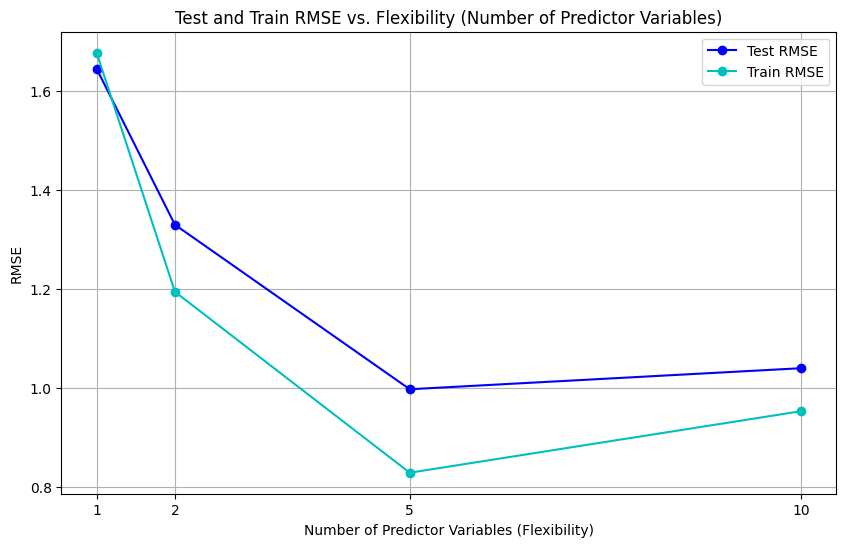

In [88]:
import matplotlib.pyplot as plt

train_rmse_values = [train_1, train_2, train_3, train_4]
test_rmse_values = [test_1, test_2, test_3, test_4]

num_predictors = [1, 2, 5, 10]

plt.figure(figsize=(10, 6))
plt.plot(num_predictors, test_rmse_values, marker='o', linestyle='-', color='b', label='Test RMSE')
plt.plot(num_predictors, train_rmse_values, marker='o', linestyle='-', color='c', label='Train RMSE')
plt.title('Test and Train RMSE vs. Flexibility (Number of Predictor Variables)')
plt.xlabel('Number of Predictor Variables (Flexibility)')
plt.ylabel('RMSE')
plt.xticks(num_predictors)
plt.grid()
plt.legend()
plt.show()

My best model would be my 10-degree polynomial--it has the lowest errors and a relatively small gap between its test and train RMSE's. It also has the 2nd highest r-squared numbers of all my models.